In [97]:
import BioSimSpace as bss
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import matplotlib

In [19]:
scipy.constants.Avogadro

6.02214076e+23

In [98]:
_K_B = scipy.constants.Boltzmann
_TEMPERATURE = 300
_N_A = scipy.constants.Avogadro


def inhibition_to_ddg(ki_a: float, ki_b: float) -> float:
    """
    convert experimental Ki values to binding free-energy difference
    :param ki_a: experimental Ki of ligand 1
    :param ki_b: experimental Ki of ligand 2
    :return: experimental RBFE value
    """
    ic50_a = 2 * ki_a
    ic50_b = 2 * ki_b

    return (_K_B * _N_A * _TEMPERATURE / 4184) * np.log(ic50_b / ic50_a)


def get_experimental_error(error_a, ki_a, error_b, ki_b):
    fraction = ki_b / ki_a
    fraction_error = fraction * np.sqrt((error_b / ki_b) ** 2 + (error_a / ki_a) ** 2)
    return (_K_B * _TEMPERATURE * fraction_error / fraction) * _N_A / 4184

In [102]:
somd_path = "/home/jguven/projects/metalloenzymes/kpc2/outputs/SOMD/"
paths = glob.glob(somd_path + "*/")
print(paths[0].split("/")[-2])

lig_5~lig_10


In [103]:
# free_directory = "/home/jguven/projects/metalloenzymes/kpc2/outputs/SOMD/lig_1~lig_2/unbound/"
# bound_directory = "/home/jguven/projects/metalloenzymes/kpc2/outputs/SOMD/lig_1~lig_2/bound/"



header_file = "/home/jguven/projects/metalloenzymes/scripts/simfile_header.txt"
with open(header_file, "r") as file:
    header = file.readlines()

somd_path = "/home/jguven/projects/metalloenzymes/kpc2/outputs/SOMD/"
paths = glob.glob(somd_path + "*/")

for path in paths:
    ligand = path.split("/")[-2]
    free_directory = somd_path + ligand + "/unbound/"
    bound_directory = somd_path + ligand + "/bound/"
    
    unbound_min_simfiles = sorted(glob.glob(free_directory + "/minimisation/lambda_*/simfile.dat"))

    unbound_simfiles = sorted(glob.glob(free_directory + "lambda_*/simfile.dat"))

    bound_simfiles = sorted(glob.glob(bound_directory + "lambda_*/simfile.dat"))

    for i in range(len(unbound_min_simfiles)):

        with open(unbound_min_simfiles[i], "r") as file:
            min_simfile_lines = file.readlines()

        with open(unbound_min_simfiles[i], "r") as file:
            for j, line in enumerate(file):
                if "lambda" in line:
                    start = j
                if "#" not in line:
                    end = j
                    break

        lambda_header = min_simfile_lines[start:end]
        full_header = header + lambda_header

        with open(unbound_simfiles[i], "r+") as file:
            data = file.readlines()
            file.seek(0, 0)
            header_and_data = full_header + data
            file.writelines(header_and_data)

        with open(bound_simfiles[i], "r+") as file:
            data = file.readlines()
            file.seek(0, 0)
            header_and_data = full_header + data
            file.writelines(header_and_data)


# for simfile in unbound_simfiles:

# for simfile in bound_simfiles:
#     with open(simfile, "r+") as file:
#         data = file.readlines()
#         file.seek(0, 0)
#         header_and_data = header + data
#         file.writelines(header_and_data)



In [42]:

# unbound_simfiles = glob.glob(free_directory + "lambda_*/simfile.dat")
# bound_simfiles = glob.glob(bound_directory + "lambda_*/simfile.dat")

# for simfile in unbound_simfiles:
#     with open(simfile, "r+") as file:
#         data = file.readlines()
#         file.seek(0, 0)
#         header_and_data = header + data
#         file.writelines(header_and_data)

# for simfile in bound_simfiles:
#     with open(simfile, "r+") as file:
#         data = file.readlines()
#         file.seek(0, 0)
#         header_and_data = header + data
#         file.writelines(header_and_data)



In [104]:

analysis_file = "../kpc2/afe/somd_results_analysis.txt"

somd_path = "/home/jguven/projects/metalloenzymes/kpc2/outputs/SOMD/"
paths = glob.glob(somd_path + "*/")

with open(analysis_file, "w") as file:
    for path in paths:
        ligand = path.split("/")[-2]
        free_directory = somd_path + ligand + "/unbound/"
        bound_directory = somd_path + ligand + "/bound/"

        print(ligand)
        transformation = path.split("/")[-2]
        file.write(transformation+"\n")
        free_directory = path + "unbound/"
        bound_directory = path + "bound/"
        try:
            pmf_free, overlap_matrix_free = bss.FreeEnergy.Relative.analyse(free_directory)
            pmf_bound, overlap_matrix_bound = bss.FreeEnergy.Relative.analyse(bound_directory)    
            free_energy_difference, free_energy_error = bss.FreeEnergy.Relative.difference(pmf_bound, pmf_free)
            file.write(f"{free_energy_difference} \u00B1 {free_energy_error} \n")    
        except IndexError as e:
            print(str(e)+"\n")
        except ValueError as e:
            print(str(e)+"\n")

lig_5~lig_10
lig_11~lig_5
lig_1~lig_4
lig_16~lig_9
lig_11~lig_15
lig_13~lig_7
lig_9~lig_5
lig_1~lig_2
lig_3~lig_6
lig_2~lig_4
lig_15~lig_9
lig_15~lig_5
lig_13~lig_3
lig_4~lig_16
lig_6~lig_8
lig_4~lig_6
lig_12~lig_15
lig_10~lig_4
lig_14~lig_15
lig_6~lig_7
lig_10~lig_8
lig_9~lig_10
lig_13~lig_6
lig_16~lig_10
lig_12~lig_14


In [105]:
with open(analysis_file, "r") as file:
    lines = file.readlines()
results = [line for line in lines[1:len(lines):2]]
free_energy_differences = []
free_energy_errors = []
for result in results:
    split_results = result.split("±")
    free_energy_differences.append(float(split_results[0].replace("kcal/mol", "").replace("⁻¹ \n", "")))
    free_energy_errors.append(float(split_results[1].replace("kcal/mol", "").replace("⁻¹ \n", "").replace("kcal mol", "")))
    

In [106]:
perturbations = [line for line in lines[0:len(lines):2]]
for line in perturbations:
    print(line)

lig_5~lig_10

lig_11~lig_5

lig_1~lig_4

lig_16~lig_9

lig_11~lig_15

lig_13~lig_7

lig_9~lig_5

lig_1~lig_2

lig_3~lig_6

lig_2~lig_4

lig_15~lig_9

lig_15~lig_5

lig_13~lig_3

lig_4~lig_16

lig_6~lig_8

lig_4~lig_6

lig_12~lig_15

lig_10~lig_4

lig_14~lig_15

lig_6~lig_7

lig_10~lig_8

lig_9~lig_10

lig_13~lig_6

lig_16~lig_10

lig_12~lig_14



In [107]:
first_indices = []
second_indices = []
for line in perturbations:
    no_newline = line.strip("\n")
    lig_1 = no_newline.split("~")[0].replace("lig_", "")
    lig_2 = no_newline.split("~")[1].replace("lig_", "")  
    first_indices.append(int(lig_1) - 1)
    second_indices.append(int(lig_2) - 1)

for i in range(len(first_indices)):
    print(first_indices[i], second_indices[i])

4 9
10 4
0 3
15 8
10 14
12 6
8 4
0 1
2 5
1 3
14 8
14 4
12 2
3 15
5 7
3 5
11 14
9 3
13 14
5 6
9 7
8 9
12 5
15 9
11 13


In [108]:
experimental_file = pd.read_csv("../kpc2/afe/experimental_ki.txt")
experimental_ki, experimental_ki_error = experimental_file["K_i"], experimental_file["K_i_err"]
print(experimental_file)

    ligand      K_i  K_i_err
0        1   32.900    3.300
1        2    8.400    0.400
2        3   15.300    2.500
3        4   23.300    4.600
4        5  154.400    0.000
5        6    1.400    0.200
6        7   11.900    1.100
7        8    9.300    1.800
8        9    0.246    0.047
9       10    8.500    0.300
10      11  142.300   22.300
11      12  101.500    8.600
12      13    2.200    0.800
13      14  730.400   87.400
14      15  326.100   56.800
15      16    0.020    0.007


In [109]:
experimental_free_energies = []
experimental_errors = []
for i in range(len(first_indices)):
    i_1, i_2 = first_indices[i], second_indices[i]
    experimental_free_energy = inhibition_to_ddg(experimental_ki[i_1], experimental_ki[i_2])
    # error_a, ki_a, error_b, ki_b
    experimental_error = get_experimental_error(experimental_ki_error[i_1], experimental_ki[i_1], experimental_ki_error[i_2], experimental_ki[i_2])
    experimental_free_energies.append(experimental_free_energy)
    experimental_errors.append(experimental_error)
                                                

In [110]:
for thing in experimental_free_energies:
    print(thing)

-1.728557983789902
0.04865220469133636
-0.20568714501253604
1.4961259025040572
0.4943766224258666
1.0063685493385288
3.840453292334041
-0.8139037901191131
-1.4256485088031916
0.608216645106577
-4.286177710068571
-0.44572441773453025
1.1561924799798395
-4.209182610764325
1.1288565153896049
-1.6763942594195855
0.6958068238320647
0.6011613997161285
-0.48073744726016066
1.2758245781618809
0.05362365568614809
2.111895308544139
-0.2694560288233521
3.6080212110481957
1.1765442710922254


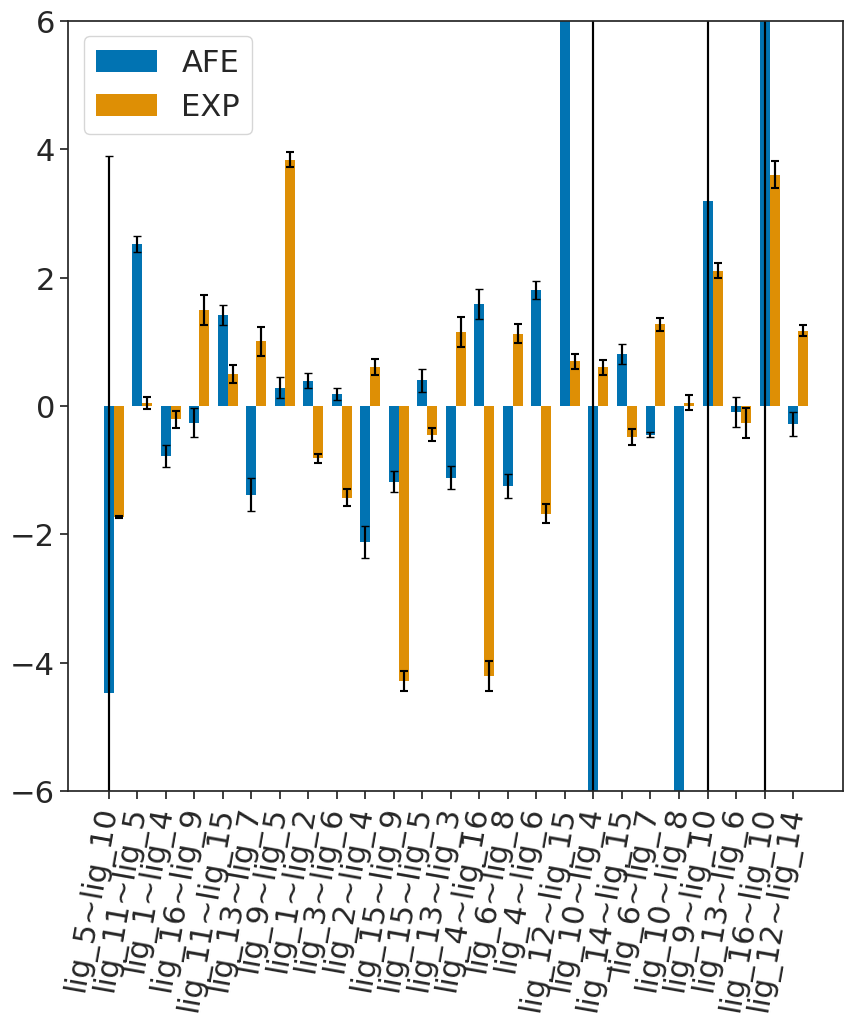

In [111]:
fig = plt.figure(figsize=(10, 10))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
x_label_locations = np.arange(len(free_energy_differences))
bar_width = 0.35

plt.bar(x_label_locations - bar_width / 2,
        height=free_energy_differences,
        width=bar_width,
        yerr=free_energy_errors,
        label="AFE",
        # color="#0099AB",
        linewidth=0)

(_, caps, _) = plt.errorbar(x_label_locations - bar_width / 2,
                            free_energy_differences,
                            color="black",
                            yerr=free_energy_errors,
                            capsize=3,
                            linestyle="")

plt.bar(x_label_locations + bar_width / 2,
        height=experimental_free_energies,
        width=bar_width,
        yerr=experimental_errors,
        label="EXP",
        # color="#0099AB",
        linewidth=0)

(_, caps, _) = plt.errorbar(x_label_locations + bar_width / 2,
                            experimental_free_energies,
                            color="black",
                            yerr=experimental_errors,
                            capsize=3,
                            linestyle="")

for cap in caps:
    cap.set_color("black")
    cap.set_markeredgewidth(1.5)
# plt.ylim(-55, -40)
plt.ylim(-6, 6)
plt.xticks(x_label_locations - bar_width / 2, perturbations, rotation=80, ha="center")
plt.legend()


(-4.5, 4.5)

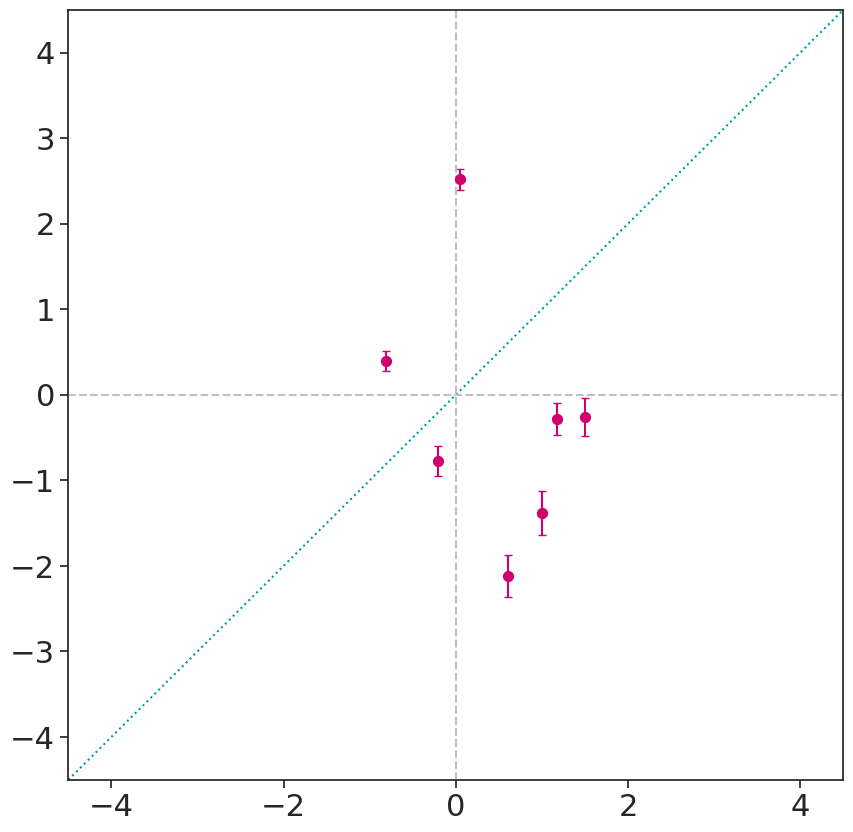

In [92]:
plt.figure(figsize=(10, 10))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plt.scatter(experimental_free_energies, free_energy_differences, s=50, color="#D0006F")
# plt.scatter(3, 2.5, s=0)

(_, caps, _) = plt.errorbar(experimental_free_energies,
                           free_energy_differences,
                           color="#D0006F",
                           yerr=free_energy_errors,
                           capsize=3,
                           linestyle="",
                           zorder=-1)

plt.plot([-4.5, 4.5], [-4.5, 4.5], color="#0099AB", linestyle=":", zorder=-1)
plt.vlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.hlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)


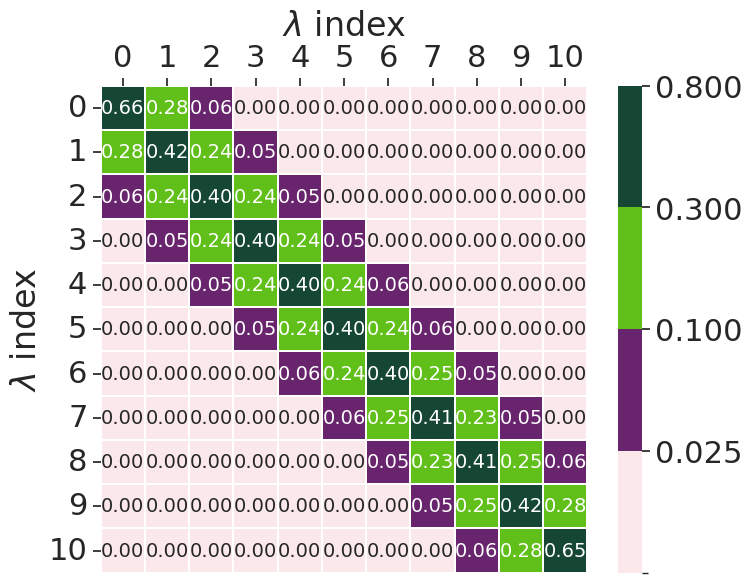

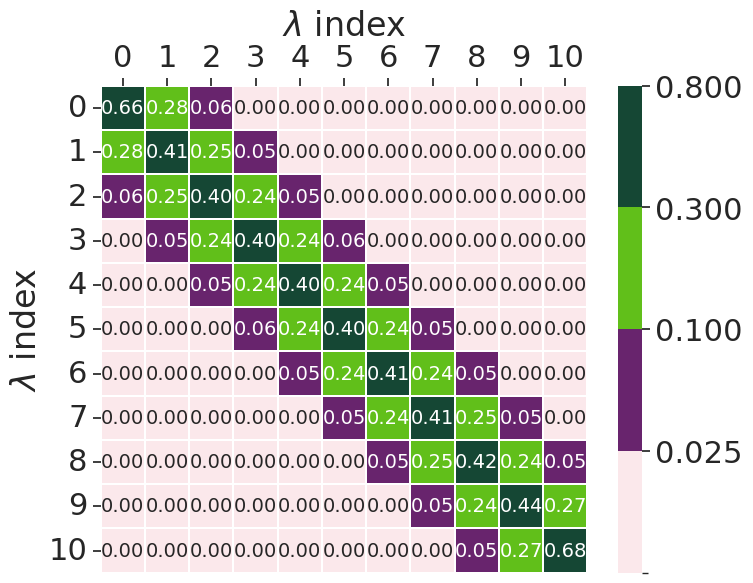

In [94]:
# ligands_all = np.arange(2, 17, 1)
# ligands = np.delete(ligands_all, [10, 12, 13])
stages = ["bound", "unbound"]
# for ligand in ligands:
for stage in stages:
    mbar_file = f"../kpc2/outputs/SOMD/lig_11~lig_5/{stage}/mbar.txt"
    start_index = 1
    end_index = -1
    matrix_lines = []
    with open(mbar_file) as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if "#Overlap matrix" in lines[i]:
                start_index = i + 1
            elif "#DG from neighbouring lambda in kcal/mol" in lines[i]:
                end_index = i
        matrix_lines = lines[start_index:end_index]
    
    matrix = []
    for line in matrix_lines:
        split_line = line.replace("\n", "").split(" ")
        new_line = [float(x) for x in split_line]
        matrix.append(new_line)
    
    colour_map = matplotlib.colors.ListedColormap(['#FBE8EB','#68246D','#61BF1A', '#154734'])
    n_colours = colour_map.N
    boundary_values = [0.0, 0.025, 0.1, 0.3, 0.8]
    norm_colours = matplotlib.colors.BoundaryNorm(boundary_values, n_colours, clip=False)
    colour_bar_args = dict(ticks=[0.025, 0.1, 0.3, 0.8],
                        shrink=0.685)

    fig = plt.figure(figsize=(8, 8))
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=2)
    ax = sns.heatmap(matrix, 
                    annot=True, 
                    fmt=".2f", 
                    linewidths=0.3, 
                    annot_kws={"size": 14}, 
                    square=True, 
                    robust=True, 
                    cmap=colour_map,
                    norm=norm_colours, 
                    cbar_kws=colour_bar_args,
                    vmax=1
                    )
    ax.xaxis.tick_top()
    ax.tick_params(axis="y", rotation=360)
    ax.set_title(r"$\lambda$ index", fontsize=24)
    ax.set_ylabel(r"$\lambda$ index", fontsize=24)
    # ax.set_xlabel(f"{stage} ligand {ligand}", fontsize=24)
    fig.tight_layout()

In [23]:
pearson_r = scipy.stats.pearsonr(experimental_free_energies, free_energy_differences)
pearson_r

PearsonRResult(statistic=-0.7282818140814391, pvalue=0.16291716655872157)